In [1]:
from classi_copy import classifier
from sklearn.model_selection import train_test_split
a = classifier()
seqs_list = a.readFa2seqslist('*.fa')

seqs_train,seqs_test = train_test_split(seqs_list,test_size=0.2,random_state=1008600)

In [2]:
df_train = a.seqs2df(seqs_train,5)
x_train = df_train.iloc[:,:df_train.shape[1]-1]
y_train = df_train['target']

df_test = a.seqs2df(seqs_test,5)
x_test = df_test.iloc[:,:df_test.shape[1]-1]
y_test = df_test['target']
print ("done")

done


In [3]:
from sklearn import svm
model = svm.SVC(C = 1, kernel= "rbf",probability=True)
model.fit(x_train,y_train)
y_prob = model.predict_proba(x_test)

In [4]:
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_prob[:,1], pos_label=1)

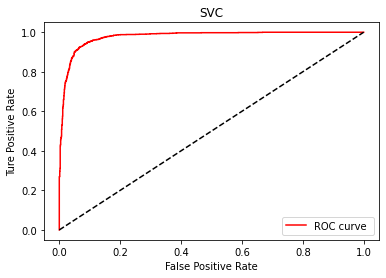

In [6]:
# 画出ROC曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red'
         ,label='ROC curve ')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# 为了让曲线不黏在图的边缘
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.title('SVC')
plt.legend(loc="lower right")
plt.show()